<a href="https://colab.research.google.com/github/riphunter7001x/MultiModal_RAG/blob/main/rag_with_huggingface_and_mongodb_with_phi_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets pandas pymongo sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.0/670.0 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.7/224.7 kB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 41.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.w

In [2]:
!pip install -U transformers accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 40.7 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.41.1
    Uninstalling transformers-4.41.1:
      Successfully uninstalled transformers-4.41.1


In [3]:
from datasets import load_dataset

In [4]:
import pandas as pd

In [5]:
#dataset=load_dataset("AIatMongoDB/embedded_movies")
dataset=load_dataset("MongoDB/embedded_movies")
#MongoDB/embedded_movies

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/1500 [00:00<?, ? examples/s]

In [6]:
dataset

DatasetDict({
    train: Dataset({
        features: ['directors', 'title', 'imdb', 'plot_embedding', 'awards', 'rated', 'countries', 'type', 'writers', 'metacritic', 'languages', 'fullplot', 'genres', 'poster', 'cast', 'runtime', 'plot', 'num_mflix_comments'],
        num_rows: 1500
    })
})

In [7]:
dataset_df=pd.DataFrame(dataset["train"])

In [8]:
dataset_df.head()

,directors,title,imdb,plot_embedding,awards,rated,countries,type,writers,metacritic,languages,fullplot,genres,poster,cast,runtime,plot,num_mflix_comments
0,"[Louis J. Gasnier, Donald MacKenzie]",The Perils of Pauline,"{'id': 4465, 'rating': 7.6, 'votes': 744}","[0.00072939653, -0.026834568, 0.013515796, -0....","{'nominations': 0, 'text': '1 win.', 'wins': 1}",None,[USA],movie,"[Charles W. Goddard (screenplay), Basil Dickey...",NaN,[English],Young Pauline is left a lot of money when her ...,[Action],https://m.media-amazon.com/images/M/MV5BMzgxOD...,"[Pearl White, Crane Wilbur, Paul Panzer, Edwar...",199.0,Young Pauline is left a lot of money when her ...,0
1,"[Alfred J. Goulding, Hal Roach]",From Hand to Mouth,"{'id': 10146, 'rating': 7.0, 'votes': 639}","[-0.022837115, -0.022941574, 0.014937485, -0.0...","{'nominations': 1, 'text': '1 nomination.', 'w...",TV-G,[USA],movie,[H.M. Walker (titles)],NaN,[English],As a penniless man worries about how he will m...,"[Comedy, Short, Action]",https://m.media-amazon.com/images/M/MV5BNzE1OW...,"[Harold Lloyd, Mildred Davis, 'Snub' Pollard, ...",22.0,A penniless young man tries to save an heiress...,0
2,[Herbert Brenon],Beau Geste,"{'id': 16634, 'rating': 6.9, 'votes': 222}","[0.00023330493, -0.028511643, 0.014653289, -0....","{'nominations': 0, 'text': '1 win.', 'wins': 1}",None,[USA],movie,"[Herbert Brenon (adaptation), John Russell (ad...",NaN,[English],"Michael ""Beau"" Geste leaves England in disgrac...","[Action, Adventure, Drama]",None,"[Ronald Colman, Neil Hamilton, Ralph Forbes, A...",101.0,"Michael ""Beau"" Geste leaves England in disgrac...",0
3,[Albert Parker],The Black Pirate,"{'id': 16654, 'rating': 7.2, 'votes': 1146}","[-0.005927917, -0.033394486, 0.0015323418, -0....","{'nominations': 0, 'text': '1 win.', 'wins': 1}",None,[USA],movie,"[Douglas Fairbanks (story), Jack Cunningham (a...",NaN,None,A nobleman vows to avenge the death of his fat...,"[Adventure, Action]",https://m.media-amazon.com/images/M/MV5BMzU0ND...,"[Billie Dove, Tempe Pigott, Donald Crisp, Sam ...",88.0,"Seeking revenge, an athletic young man joins t...",1
4,[Sam Taylor],For Heaven's Sake,"{'id': 16895, 'rating': 7.6, 'votes': 918}","[-0.0059373598, -0.026604708, -0.0070914757, -...","{'nominations': 1, 'text': '1 nomination.', 'w...",PASSED,[USA],movie,"[Ted Wilde (story), John Grey (story), Clyde B...",NaN,[English],"The Uptown Boy, J. Harold Manners (Lloyd) is a...","[Action, Comedy, Romance]",https://m.media-amazon.com/images/M/MV5BMTcxMT...,"[Harold Lloyd, Jobyna Ralston, Noah Young, Jim...",58.0,An irresponsible young millionaire changes his...,0


In [9]:
dataset_df.columns

Index(['directors', 'title', 'imdb', 'plot_embedding', 'awards', 'rated',
       'countries', 'type', 'writers', 'metacritic', 'languages', 'fullplot',
       'genres', 'poster', 'cast', 'runtime', 'plot', 'num_mflix_comments'],
      dtype='object')

In [10]:
dataset_df["plot"][0]

"Young Pauline is left a lot of money when her wealthy uncle dies. However, her uncle's secretary has been named as her guardian until she marries, at which time she will officially take ..."

In [11]:
dataset_df["fullplot"][0]

'Young Pauline is left a lot of money when her wealthy uncle dies. However, her uncle\'s secretary has been named as her guardian until she marries, at which time she will officially take possession of her inheritance. Meanwhile, her "guardian" and his confederates constantly come up with schemes to get rid of Pauline so that he can get his hands on the money himself.'

In [12]:
dataset_df["num_mflix_comments"][0]

0

In [13]:
dataset_df["fullplot"].isnull().sum()

48

In [14]:
dataset_df.shape

(1500, 18)

In [15]:
dataset_df["poster"][0]

'https://m.media-amazon.com/images/M/MV5BMzgxODk1Mzk2Ml5BMl5BanBnXkFtZTgwMDg0NzkwMjE@._V1_SY1000_SX677_AL_.jpg'

In [16]:
dataset_df.isnull().sum()

directors              13
title                   0
imdb                    0
plot_embedding         28
awards                  0
rated                 308
countries               0
type                    0
writers                13
metacritic            928
languages               1
fullplot               48
genres                  0
poster                 89
cast                    1
runtime                15
plot                   27
num_mflix_comments      0
dtype: int64

In [17]:
dataset_df=dataset_df.dropna(subset=["fullplot"])

In [18]:
dataset_df["fullplot"].isnull().sum()

0

In [19]:
dataset_df = dataset_df.drop(columns=["plot_embedding"])

In [20]:
dataset_df.head(2)

,directors,title,imdb,awards,rated,countries,type,writers,metacritic,languages,fullplot,genres,poster,cast,runtime,plot,num_mflix_comments
0,"[Louis J. Gasnier, Donald MacKenzie]",The Perils of Pauline,"{'id': 4465, 'rating': 7.6, 'votes': 744}","{'nominations': 0, 'text': '1 win.', 'wins': 1}",None,[USA],movie,"[Charles W. Goddard (screenplay), Basil Dickey...",NaN,[English],Young Pauline is left a lot of money when her ...,[Action],https://m.media-amazon.com/images/M/MV5BMzgxOD...,"[Pearl White, Crane Wilbur, Paul Panzer, Edwar...",199.0,Young Pauline is left a lot of money when her ...,0
1,"[Alfred J. Goulding, Hal Roach]",From Hand to Mouth,"{'id': 10146, 'rating': 7.0, 'votes': 639}","{'nominations': 1, 'text': '1 nomination.', 'w...",TV-G,[USA],movie,[H.M. Walker (titles)],NaN,[English],As a penniless man worries about how he will m...,"[Comedy, Short, Action]",https://m.media-amazon.com/images/M/MV5BNzE1OW...,"[Harold Lloyd, Mildred Davis, 'Snub' Pollard, ...",22.0,A penniless young man tries to save an heiress...,0


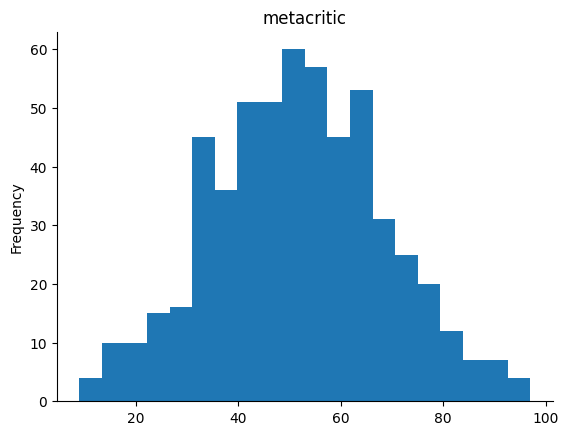

In [ ]:
# @title metacritic

from matplotlib import pyplot as plt
dataset_df['metacritic'].plot(kind='hist', bins=20, title='metacritic')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [17]:
from sentence_transformers import SentenceTransformer
embedding_model = SentenceTransformer("thenlper/gte-large")

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when p

In [22]:
dataset_df["fullplot"][2]

'Michael "Beau" Geste leaves England in disgrace and joins the infamous French Foreign Legion. He is reunited with his two brothers in North Africa, where they face greater danger from their own sadistic commander than from the rebellious Arabs.'

In [ ]:
text="   sunny savita is  a data scientist who create prodcut of data"

In [ ]:
text="   sunny savita is  a data scientist who create prodcut of data     "


In [ ]:
text

'   sunny savita is  a data scientist who create prodcut of data     '

In [ ]:
text.strip()

'sunny savita is  a data scientist who create prodcut of data'

In [23]:
def get_embedding(text:str)->list[float]:

  if not text.strip():
    print("attempted to get embedding for empty text.")
    return []

  embedding=embedding_model.encode(text)
  return embedding.tolist()


In [24]:
dataset_df["embedding"]=dataset_df["fullplot"].apply(get_embedding)

In [25]:
dataset_df.head(3)

,directors,title,imdb,awards,rated,countries,type,writers,metacritic,languages,fullplot,genres,poster,cast,runtime,plot,num_mflix_comments,embedding
0,"[Louis J. Gasnier, Donald MacKenzie]",The Perils of Pauline,"{'id': 4465, 'rating': 7.6, 'votes': 744}","{'nominations': 0, 'text': '1 win.', 'wins': 1}",None,[USA],movie,"[Charles W. Goddard (screenplay), Basil Dickey...",NaN,[English],Young Pauline is left a lot of money when her ...,[Action],https://m.media-amazon.com/images/M/MV5BMzgxOD...,"[Pearl White, Crane Wilbur, Paul Panzer, Edwar...",199.0,Young Pauline is left a lot of money when her ...,0,"[-0.009285837411880493, -0.005062109790742397,..."
1,"[Alfred J. Goulding, Hal Roach]",From Hand to Mouth,"{'id': 10146, 'rating': 7.0, 'votes': 639}","{'nominations': 1, 'text': '1 nomination.', 'w...",TV-G,[USA],movie,[H.M. Walker (titles)],NaN,[English],As a penniless man worries about how he will m...,"[Comedy, Short, Action]",https://m.media-amazon.com/images/M/MV5BNzE1OW...,"[Harold Lloyd, Mildred Davis, 'Snub' Pollard, ...",22.0,A penniless young man tries to save an heiress...,0,"[-0.0024393806234002113, 0.02309592440724373, ..."
2,[Herbert Brenon],Beau Geste,"{'id': 16634, 'rating': 6.9, 'votes': 222}","{'nominations': 0, 'text': '1 win.', 'wins': 1}",None,[USA],movie,"[Herbert Brenon (adaptation), John Russell (ad...",NaN,[English],"Michael ""Beau"" Geste leaves England in disgrac...","[Action, Adventure, Drama]",None,"[Ronald Colman, Neil Hamilton, Ralph Forbes, A...",101.0,"Michael ""Beau"" Geste leaves England in disgrac...",0,"[0.012204288505017757, -0.011455747298896313, ..."


In [ ]:
!python --version

Python 3.10.12


In [1]:
import pymongo

In [27]:
#!python -m pip install "pymongo[srv]"


In [2]:
from pymongo.mongo_client import MongoClient

In [3]:
from google.colab import userdata
uri=userdata.get('MONGO_URI')

In [4]:
# Create a new client and connect to the server
client = MongoClient(uri)

In [5]:
# Send a ping to confirm a successful connection
try:
    client.admin.command('ping')
    print("Pinged your deployment. You successfully connected to MongoDB!")
except Exception as e:
    print(e)

Pinged your deployment. You successfully connected to MongoDB!


In [12]:
def get_mongo_client(uri):
  try:
    client = MongoClient(uri)
    client.admin.command('ping')
    print("Pinged your deployment. You successfully connected to MongoDB!")
    return client
  except Exception as e:
    print(e)
    return None

In [13]:
mongo_client=get_mongo_client(uri)

Pinged your deployment. You successfully connected to MongoDB!


In [14]:
db=mongo_client["Cluster0"]

In [15]:
collection=db["moviecollection"]

In [ ]:
# collection.insert_one({"name":"sunny",
#                        "designation": "genai engineer",
#                        "location":"bangaluru",
#                        "mailid":"sunny.savita@ineuron.ai"})

InsertOneResult(ObjectId('662c02b471d807af7238859c'), acknowledged=True)

In [ ]:
# collection.insert_one({"name":"dipesh",
#                        "designation": "ops manager",
#                        "location":"bangaluru"})

InsertOneResult(ObjectId('662c02c271d807af7238859d'), acknowledged=True)

In [ ]:
# collection2=db["moviecollectionsecond"]

In [ ]:
# collection2.insert_one({"name":"krish",
#                        "designation": "tech lead",
#                        "location":"bangaluru",
#                         "phonenumber":57454745834})

InsertOneResult(ObjectId('6624b2076f3d00cb646ca829'), acknowledged=True)

In [ ]:
# collection.delete_many({})

DeleteResult({'n': 2, 'electionId': ObjectId('7fffffff000000000000001f'), 'opTime': {'ts': Timestamp(1714160327, 1), 't': 31}, 'ok': 1.0, '$clusterTime': {'clusterTime': Timestamp(1714160327, 2), 'signature': {'hash': b'zB\xefV\x8f\xe2\xea\x11\x8ax\tR\xafg2\x07\xf5\x01\xf2R', 'keyId': 7322590180760616966}}, 'operationTime': Timestamp(1714160327, 1)}, acknowledged=True)

In [47]:
dataset_df.tail(3)

,directors,title,imdb,awards,rated,countries,type,writers,metacritic,languages,fullplot,genres,poster,cast,runtime,plot,num_mflix_comments,embedding
1497,[Vishal Bhardwaj],Omkara,"{'id': 488414, 'rating': 8.2, 'votes': 9800}","{'nominations': 13, 'text': '14 wins & 13 nomi...",None,[India],movie,"[Vishal Bhardwaj (screenplay), Robin Bhatt (sc...",NaN,[Hindi],Advocate Raghunath Mishra has arranged the mar...,"[Action, Crime, Drama]",https://m.media-amazon.com/images/M/MV5BY2NmNj...,"[Ajay Devgn, Kareena Kapoor, Saif Ali Khan, Ko...",155.0,"Shakespeare's masterpiece ""Othello"" set in mod...",1,"[0.0016241295961663127, -0.012888924218714237,..."
1498,[Steve Miner],Day of the Dead,"{'id': 489018, 'rating': 4.5, 'votes': 17177}","{'nominations': 1, 'text': '1 nomination.', 'w...",R,[USA],movie,"[Jeffrey Reddick (screenplay), George A. Romer...",NaN,[English],"In Leadville, Colorado, Captain Rhodes and his...","[Action, Horror]",https://m.media-amazon.com/images/M/MV5BNzg1Mj...,"[Mena Suvari, Nick Cannon, Michael Welch, Anna...",86.0,When a small Colorado town is overrun by the f...,1,"[0.005159135442227125, -0.007672044448554516, ..."
1499,[Doug Liman],Jumper,"{'id': 489099, 'rating': 6.1, 'votes': 226607}","{'nominations': 4, 'text': '2 wins & 4 nominat...",PG-13,"[USA, Canada]",movie,"[David S. Goyer (screenplay), Jim Uhls (screen...",35.0,"[English, Italian, Japanese, Mandarin]",David Rice is a high school student in Ann Arb...,"[Action, Adventure, Sci-Fi]",https://m.media-amazon.com/images/M/MV5BMjEwOT...,"[Hayden Christensen, Jamie Bell, Rachel Bilson...",88.0,A teenager with teleportation abilities sudden...,0,"[-0.004183385521173477, -0.00553002767264843, ..."


In [48]:
document=dataset_df.to_dict("records")

In [49]:
collection.insert_many(document)

print("data ingestion in mongodb is completed")

data ingestion in mongodb is completed


# Data Retrival

In [ ]:
{
    key:value
}

In [ ]:
{
 "fields": [{
     "numDimensions": 1024,
     "path": "embedding",
     "similarity": "cosine",
     "type": "vector"
   }]
}

{'fields': [{'numDimensions': 256,
   'path': 'embedding',
   'similarity': 'cosine',
   'type': 'vector'}]}

In [50]:
# user_query="what is the best horror movie?"

In [51]:
# query_embedding=get_embedding(user_query)

In [56]:
# query_embedding

In [ ]:
# print(query_embedding)

https://www.mongodb.com/docs/atlas/atlas-vector-search/vector-search-stage/


In [53]:
# pipeline = [

#     {
#         "$vectorSearch": {
#             "index": "vector_index",
#             "queryVector": query_embedding,
#             "path": "embedding",
#             "numCandidates": 150,  # Number of candidate matches to consider
#             "limit": 4,  # Return top 4 matches
#         }
#     },
#     {
#         "$project": {
#             "fullplot": 1,  # Include the plot field
#             "title": 1,  # Include the title field
#             "genres": 1,  # Include the genres field
#             "score": {"$meta": "vectorSearchScore"},  # Include the search score
#         }
#     }
# ]

In [54]:
# collection.aggregate(pipeline)

In [55]:
# list(collection.aggregate(pipeline))

[{'_id': ObjectId('665b43d5b7497c7edbfb9e98'),
  'title': 'Pet Sematary II',
  'fullplot': 'The "sematary" is up to its old zombie-raising tricks again. This time, the protagonists are Jeff Matthews, whose mother died in a Hollywood stage accident, and Drew Gilbert, a boy coping with an abusive stepfather.',
  'genres': ['Action', 'Horror', 'Thriller'],
  'score': 0.9100871086120605},
 {'_id': ObjectId('665b43d5b7497c7edbfba0e1'),
  'title': 'House of the Dead',
  'fullplot': 'This film is a prequel to all of the The House of the Dead video games. Set on an island off the coast, a techno rave party attracts a diverse group of college coeds and a Coast Guard officer. Soon, they discover that their X-laced escapades are to be interrupted by zombies and monsters that attack them on the ground, from the air, and in the sea, ruled by an evil entity in the House of the Dead...',
  'genres': ['Action', 'Horror'],
  'score': 0.9023109674453735},
 {'_id': ObjectId('665b43d5b7497c7edbfba20b'),
 

In [18]:
def get_embedding(text:str)->list[float]:

  if not text.strip():
    print("attempted to get embedding for empty text.")
    return []

  embedding=embedding_model.encode(text)
  return embedding.tolist()


In [19]:
def vector_search(user_query,collection):

  query_embedding=get_embedding(user_query)
  print(query_embedding)

  if query_embedding is None:
    return "Invalid query or embeddig is failed"

  pipeline=[

            {
                "$vectorSearch":{

                "index": "vector_index",
                "queryVector": query_embedding,
                "path": "embedding",
                "numCandidates": 150,  # Number of candidate matches to consider
                "limit": 4,  # Return top 4 matches


                }

            },

              {
                 "$project":{

                "fullplot": 1,  # Include the plot field
                "title": 1,  # Include the title field
                "genres": 1,  # Include the genres field
                "score": {"$meta": "vectorSearchScore"},  # Include the search score
                 }

            }

           ]

  result=collection.aggregate(pipeline)
  return list(result)


In [20]:
vector_search("what is the best horror movie to watch and why?",collection)

[0.019185977056622505, -0.01547294668853283, -0.03955464065074921, 0.0023692904505878687, -0.002659196499735117, 0.005181792192161083, -0.0075131980702281, 0.04510665312409401, -0.018112152814865112, 0.042973391711711884, 0.013434062711894512, -0.002870825817808509, 0.0054796673357486725, -0.031249191612005234, -0.004083299543708563, -0.031060393899679184, -0.04105725139379501, -0.03010973148047924, -0.032163672149181366, 0.027480388060212135, -0.003167531220242381, 0.016843508929014206, -0.04414495825767517, -0.023998169228434563, -0.01558179035782814, 0.01787446066737175, 0.021615227684378624, -0.030424680560827255, 0.04588266834616661, 0.07223066687583923, 0.0023236724082380533, -0.04596638306975365, 0.02617713436484337, -0.04897381365299225, -0.03348347544670105, -0.010095011442899704, 0.0548892579972744, 0.00158393825404346, -0.0027255003806203604, -0.03803258016705513, 0.016657156869769096, 0.014302369207143784, 0.04556025192141533, -0.011216191574931145, -0.050463683903217316, 0

[{'_id': ObjectId('665b43d5b7497c7edbfb9e98'),
  'title': 'Pet Sematary II',
  'fullplot': 'The "sematary" is up to its old zombie-raising tricks again. This time, the protagonists are Jeff Matthews, whose mother died in a Hollywood stage accident, and Drew Gilbert, a boy coping with an abusive stepfather.',
  'genres': ['Action', 'Horror', 'Thriller'],
  'score': 0.9052295684814453},
 {'_id': ObjectId('665b43d5b7497c7edbfba133'),
  'title': 'Dawn of the Dead',
  'fullplot': 'Ana, a young beautiful nurse finishes her day-shift at the hospital to return home to her beloved husband, they make love and sleep together. The next day, after her husband is killed by her neighbor next door, he suddenly comes back to life. She discovers the chaos happening in her neighborhood and escapes from her home. Soon after coming to her senses in the woods, she encounters a cop and other survivors, they decide to find safety in a mall. Soon more survivors come, and they learn that if they want to stay al

In [21]:
def get_search_result(query,collection):

  get_knowledge=vector_search(query,collection)

  search_result=""

  for result in get_knowledge:
        search_result += f"Title: {result.get('title', 'N/A')}, Plot: {result.get('fullplot', 'N/A')}\n"

  return search_result



In [22]:
query="what is the best comedy movie to watch and why?"

In [23]:
collection

Collection(Database(MongoClient(host=['ac-a4pjt0x-shard-00-02.aqutadm.mongodb.net:27017', 'ac-a4pjt0x-shard-00-00.aqutadm.mongodb.net:27017', 'ac-a4pjt0x-shard-00-01.aqutadm.mongodb.net:27017'], document_class=dict, tz_aware=False, connect=True, retrywrites=True, w='majority', appname='Cluster0', authsource='admin', replicaset='atlas-10cw6p-shard-0', tls=True), 'Cluster0'), 'moviecollection')

In [24]:
source_information=get_search_result(query,collection)

[0.01965293474495411, -0.023518932983279228, -0.03145848959684372, 0.014970563352108002, -0.016353150829672813, -0.016895774751901627, -0.011936463415622711, 0.04158833250403404, -0.013356580398976803, 0.044313620775938034, 0.004574724938720465, 0.010549061931669712, 0.012763161212205887, -0.048285387456417084, 0.005650663282722235, -0.031372006982564926, -0.037548549473285675, -0.03725144639611244, -0.02974022924900055, 0.019366946071386337, 0.004532270599156618, 0.016592098399996758, -0.034319791942834854, -0.009278474375605583, 0.008219528943300247, 0.020317645743489265, -0.009512982331216335, 0.0006080022430978715, 0.05204164236783981, 0.07381505519151688, 0.012975163757801056, -0.05585033819079399, 0.01898007094860077, -0.06078890711069107, 0.011161554604768753, -0.03324289619922638, 0.026351863518357277, 0.018502039834856987, -0.011724861338734627, -0.04501267150044441, -0.03618020564317703, -0.021296020597219467, 0.038623660802841187, -0.027672821655869484, -0.05561940371990204,

In [25]:
source_information

"Title: Fight Back to School, Plot: (Cantonese with English subtitles) Classic, slapstick, all-out-ridiculous Hong Kong action-comedy delivered by the one-and-only Stephen Chow (Kung Fu Hustle, Shaolin Soccer), who plays a SWAT team leader going undercover at a high school to retrieve a stolen gun for his captain.\nTitle: The Last Man, Plot: Apocalyptic comedy finds a socially-challenged grad school student as one of the last two men on Earth with a beautiful woman. However, the other remaining man is his superior in every sense.\nTitle: The Big Bus, Plot: The ultimate disaster film parody. A nuclear powered bus is going Non-stop from New York to Denver and is plagued by disasters due to the machinations of a mysterious group allied with the Oil lobby. When the driver is injured a washed up, down on his luck, but used to be great type, who as it happens, used to be engaged to the inventor's daughter is brought in to drive the giant bus which includes a one lane swimming pool and a one 

In [26]:
combined_information = f"Query: {query}\nContinue to answer the query by using the Search Results:\n{source_information}."

print(combined_information)

Query: what is the best comedy movie to watch and why?
Continue to answer the query by using the Search Results:
Title: Fight Back to School, Plot: (Cantonese with English subtitles) Classic, slapstick, all-out-ridiculous Hong Kong action-comedy delivered by the one-and-only Stephen Chow (Kung Fu Hustle, Shaolin Soccer), who plays a SWAT team leader going undercover at a high school to retrieve a stolen gun for his captain.
Title: The Last Man, Plot: Apocalyptic comedy finds a socially-challenged grad school student as one of the last two men on Earth with a beautiful woman. However, the other remaining man is his superior in every sense.
Title: The Big Bus, Plot: The ultimate disaster film parody. A nuclear powered bus is going Non-stop from New York to Denver and is plagued by disasters due to the machinations of a mysterious group allied with the Oil lobby. When the driver is injured a washed up, down on his luck, but used to be great type, who as it happens, used to be engaged to t

# generation

In [27]:
!pip install --upgrade huggingface_hub

In [28]:
from huggingface_hub import notebook_login
notebook_login()

In [39]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

tokenizer = AutoTokenizer.from_pretrained("microsoft/Phi-3-mini-128k-instruct")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [32]:
# CPU Enabled uncomment below 👇🏽
# model = AutoModelForCausalLM.from_pretrained("google/gemma-2b-it")
# GPU Enabled use below 👇🏽
model = AutoModelForCausalLM.from_pretrained("microsoft/Phi-3-mini-128k-instruct", device_map="auto")

config.json:   0%|          | 0.00/3.38k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/16.3k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.67G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/172 [00:00<?, ?B/s]

In [33]:
# Moving tensors to GPU
input_ids = tokenizer(combined_information, return_tensors="pt").to("cuda")

In [34]:
response = model.generate(**input_ids, max_new_tokens=500)

You are not running the flash-attention implementation, expect numerical differences.


In [35]:
print(tokenizer.decode(response[0]))

<s> Query: what is the best comedy movie to watch and why?
Continue to answer the query by using the Search Results:
Title: Fight Back to School, Plot: (Cantonese with English subtitles) Classic, slapstick, all-out-ridiculous Hong Kong action-comedy delivered by the one-and-only Stephen Chow (Kung Fu Hustle, Shaolin Soccer), who plays a SWAT team leader going undercover at a high school to retrieve a stolen gun for his captain.
Title: The Last Man, Plot: Apocalyptic comedy finds a socially-challenged grad school student as one of the last two men on Earth with a beautiful woman. However, the other remaining man is his superior in every sense.
Title: The Big Bus, Plot: The ultimate disaster film parody. A nuclear powered bus is going Non-stop from New York to Denver and is plagued by disasters due to the machinations of a mysterious group allied with the Oil lobby. When the driver is injured a washed up, down on his luck, but used to be great type, who as it happens, used to be engaged 